In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
dfIris = sns.load_dataset('iris')
dfIris.head(n=2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
X_iris = dfIris.drop('species', axis=1)
X_iris.head(n=2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [4]:
Y_iris = dfIris.species
Y_iris.head(n=2)

0    setosa
1    setosa
Name: species, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_iris = le.fit_transform(dfIris['species'])
Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
dfIris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
pd.concat([dfIris['species'], pd.DataFrame(Y_iris,columns=['species_target'])], axis=1).tail(3)

,species,species_target
147,virginica,2
148,virginica,2
149,virginica,2


In [8]:
# Bunch diccionario de objetos
bchIris = datasets.load_iris()
type(bchIris)

sklearn.utils.Bunch

In [9]:
bchIris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
print(bchIris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
pd.DataFrame(bchIris.data, columns=bchIris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
pd.DataFrame(bchIris.target, columns=['species_target']).merge(pd.DataFrame(bchIris.target_names, columns=['species_name']),
                                                              left_on='species_target', right_index=True, how='inner').head(3)

,species_target,species_name
0,0,setosa
1,0,setosa
2,0,setosa


## Linear Regresion (Supervised Learning)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

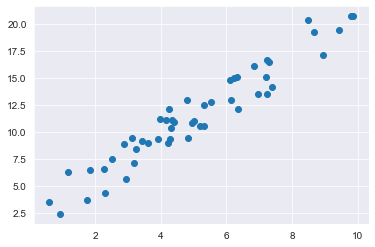

In [14]:
sns.set_style('darkgrid')
rng = np.random.RandomState(123)
x = 10 * rng.rand(50)
y = 2 * x - 1 + 5 * rng.rand(50)
plt.scatter(x, y)

In [15]:
print(type(x), type(y))
print(x.shape)
#Estructura de pandas n_sample, n_features (matrix)
X = x[:, np.newaxis] #Incrementa la dimensión de 1D a 2D
print(X.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(50,)
(50, 1)


In [16]:
# Vector fila
row_vec = x[np.newaxis, :]
print(row_vec.shape)
print(row_vec)

# Vector columna
col_vec = x[:, np.newaxis]
print(col_vec.shape)
print(col_vec)


(1, 50)
[[6.96469186 2.86139335 2.26851454 5.51314769 7.1946897  4.2310646
  9.80764198 6.84829739 4.80931901 3.92117518 3.43178016 7.29049707
  4.38572245 0.59677897 3.98044255 7.37995406 1.8249173  1.75451756
  5.31551374 5.31827587 6.34400959 8.49431794 7.24455325 6.11023511
  7.22443383 3.22958914 3.61788656 2.28263231 2.93714046 6.30976124
  0.9210494  4.33701173 4.30862763 4.93685098 4.2583029  3.12261223
  4.26351307 8.93389163 9.44160018 5.01836676 6.23952952 1.15618395
  3.17285482 4.14826212 8.66309158 2.50455365 4.83034264 9.85559786
  5.19485119 6.12894526]]
(50, 1)
[[6.96469186]
 [2.86139335]
 [2.26851454]
 [5.51314769]
 [7.1946897 ]
 [4.2310646 ]
 [9.80764198]
 [6.84829739]
 [4.80931901]
 [3.92117518]
 [3.43178016]
 [7.29049707]
 [4.38572245]
 [0.59677897]
 [3.98044255]
 [7.37995406]
 [1.8249173 ]
 [1.75451756]
 [5.31551374]
 [5.31827587]
 [6.34400959]
 [8.49431794]
 [7.24455325]
 [6.11023511]
 [7.22443383]
 [3.22958914]
 [3.61788656]
 [2.28263231]
 [2.93714046]
 [6.30976

In [17]:
from sklearn.linear_model import LinearRegression
modelo_lineal = LinearRegression(fit_intercept=True)
modelo_lineal

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
modelo_lineal.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
modelo_lineal.coef_, modelo_lineal.intercept_

(array([1.85556153]), 2.229875293271574)

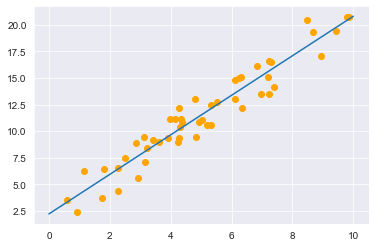

In [20]:
xfit = np.linspace(0, 10)[:, np.newaxis]
yfit = modelo_lineal.predict(xfit)
plt.scatter(x, y, color='orange')
plt.plot(xfit, yfit)

In [21]:
print('Model slope: ', modelo_lineal.coef_[0])
print('Model intercept: ', modelo_lineal.intercept_)

Model slope:  1.8555615293227943
Model intercept:  2.229875293271574


## Regresión Múltiple

In [22]:
bchBoston = datasets.load_boston()

In [23]:
bchBoston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [24]:
print(bchBoston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
    dfBoston_features = pd.DataFrame(bchBoston.data, columns=bchBoston.feature_names)
dfBoston_features.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [26]:
dfBoston_target = pd.DataFrame(bchBoston.target, columns=['MEDV'])
dfBoston_target.head(2)

,MEDV
0,24.0
1,21.6


In [27]:
dfBoston = pd.concat([dfBoston_features, dfBoston_target], axis=1)
dfBoston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [28]:
dfBoston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

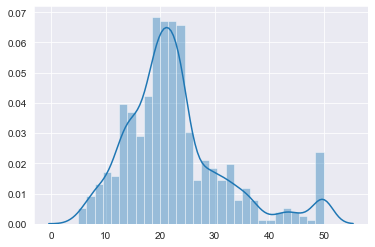

In [29]:
sns.distplot(dfBoston_target, bins=30)

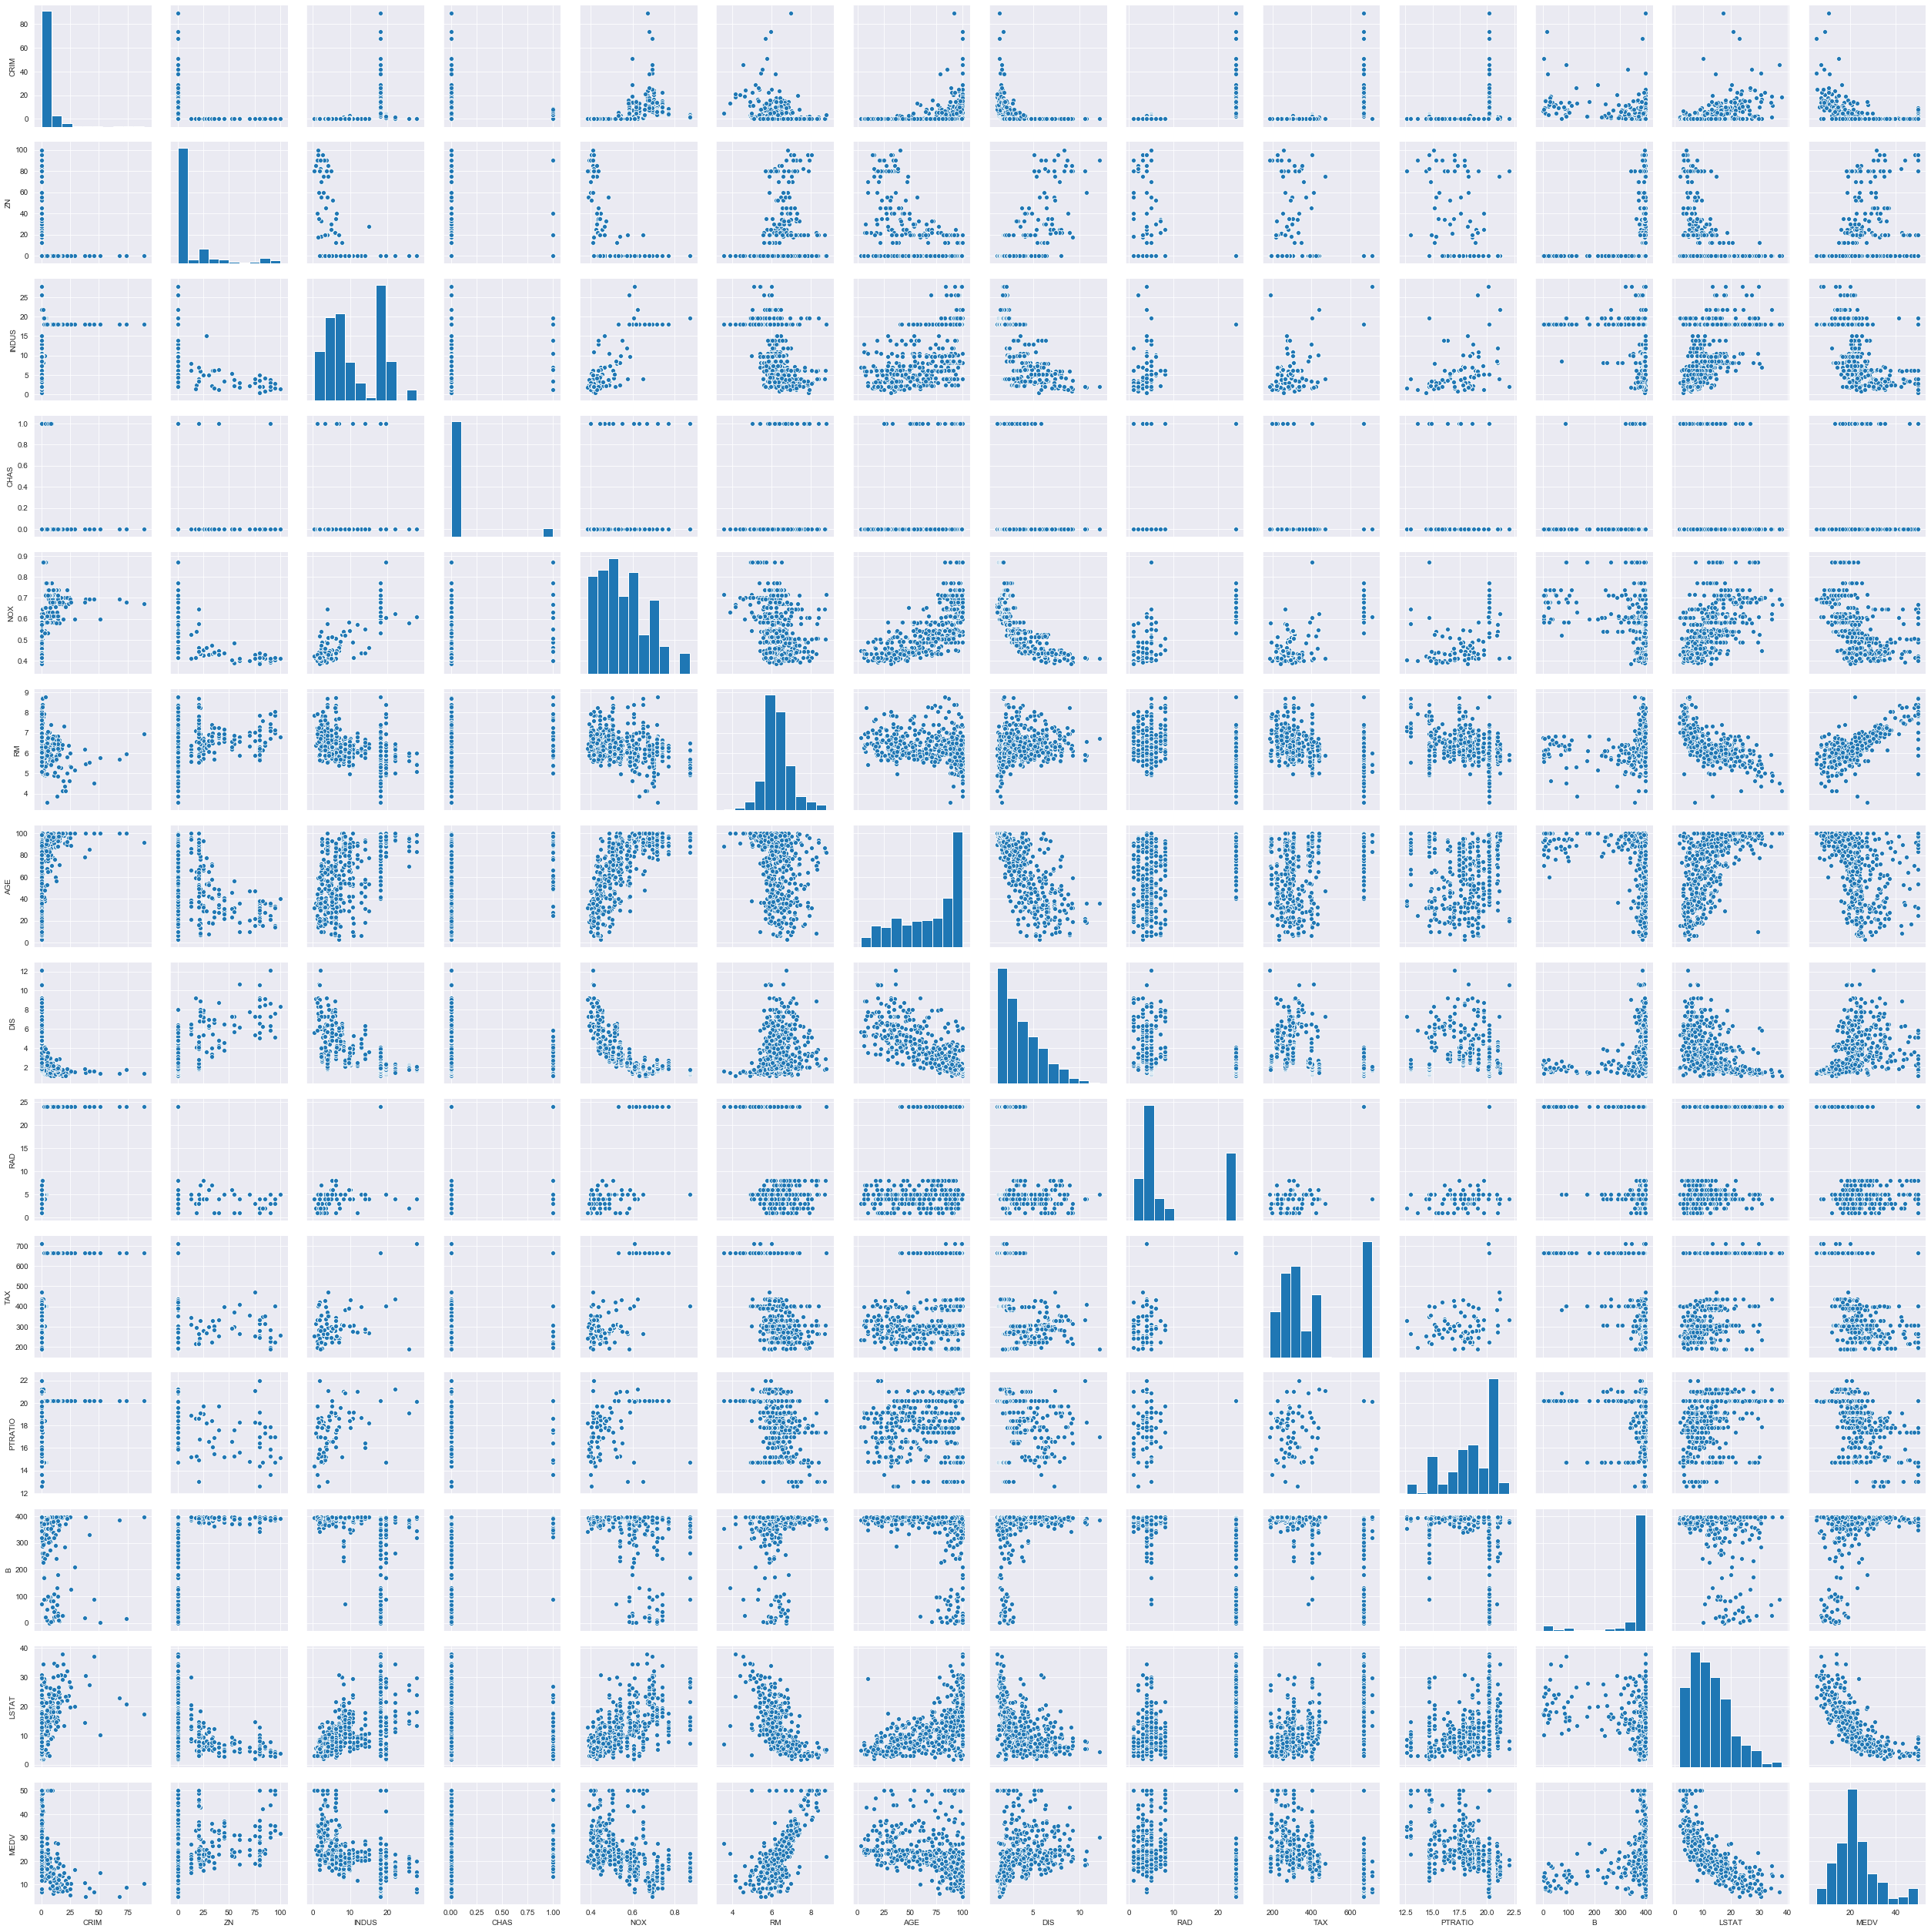

In [30]:
sns.pairplot(dfBoston)

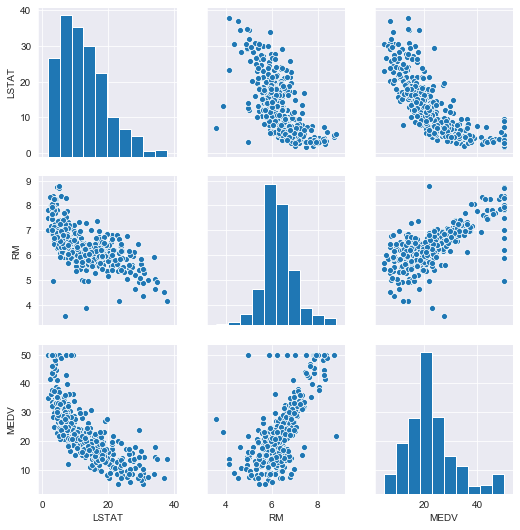

In [31]:
sns.pairplot(dfBoston[['LSTAT', 'RM', 'MEDV']])

In [32]:
 dfBoston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


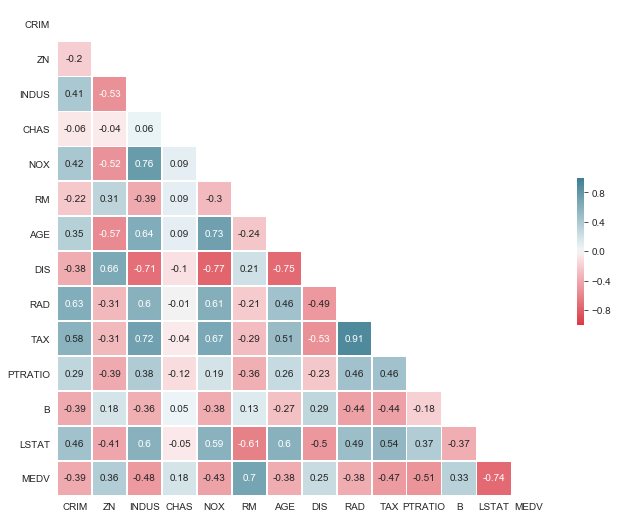

In [33]:
#Matriz de correlaciones
sns.set_style('whitegrid')
corr_matrix = dfBoston.corr().round(2)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=0.6, cbar_kws={"shrink": 0.3}, annot=True)

In [34]:
from sklearn.model_selection import train_test_split
X, y = dfBoston_features, dfBoston_target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#test_size=0.3
print("Training (%): {0: .2%}".format((X_train.shape[0])/(X_train.shape[0] + X_test.shape[0])))
print("Test (%): {0: .2%}".format((X_test.shape[0])/(X_train.shape[0] + X_test.shape[0])))

Training (%):  74.90%
Test (%):  25.10%


In [35]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)), end="\n\n")
print("lr.coef_:", (pd.DataFrame(np.hstack(lr.coef_), index=dfBoston_features.columns)), sep="\n", end="\n\n")
print("lr.intercept_:", lr.intercept_, sep="\n")

Training set score: 0.77
Test set score: 0.64

lr.coef_:
                 0
CRIM     -0.117735
ZN        0.044017
INDUS    -0.005768
CHAS      2.393416
NOX     -15.589421
RM        3.768968
AGE      -0.007035
DIS      -1.434956
RAD       0.240081
TAX      -0.011297
PTRATIO  -0.985547
B         0.008444
LSTAT    -0.499117

lr.intercept_:
[36.93325546]


In [37]:
# Validación cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=6)
print(scores, end='\n\n')
print("Precisión del modelo: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))


[0.73465778 0.67827927 0.72868343 0.55182181 0.8033191  0.77403378]

Precisión del modelo: 0.71 (+/- 0.16)


## Regresión Ridge (Regularización L2 norm)

In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)), end="\n\n")
print("Ridge.coef_:", (pd.DataFrame(np.hstack(ridge.coef_), index=dfBoston_features.columns)), sep="\n", end="\n\n")
print("Ridge.intercept_:", ridge.intercept_, sep="\n")

Training set score: 0.77
Test set score: 0.63

lr.coef_:
                0
CRIM    -0.114786
ZN       0.045418
INDUS   -0.035403
CHAS     2.303291
NOX     -8.127445
RM       3.806341
AGE     -0.014282
DIS     -1.336939
RAD      0.216748
TAX     -0.011755
PTRATIO -0.903937
B        0.008813
LSTAT   -0.507425

lr.intercept_:
[31.84973178]


## Regresión Lasso (Regularización L1 norm)

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)), end="\n\n")
print("lasso.coef_:", (pd.DataFrame(np.hstack(lasso.coef_), index=dfBoston_features.columns)), sep="\n", end="\n\n")
print("lasso.intercept_:", lasso.intercept_, sep="\n")

Training set score: 0.72
Test set score: 0.55

lr.coef_:
                0
CRIM    -0.058738
ZN       0.049994
INDUS   -0.001589
CHAS     0.000000
NOX     -0.000000
RM       0.761785
AGE      0.013047
DIS     -0.710109
RAD      0.195516
TAX     -0.014148
PTRATIO -0.805246
B        0.007098
LSTAT   -0.742146

lr.intercept_:
[44.73153183]


## Regresión polinomial

In [43]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

Text(0, 0.5, 'y')

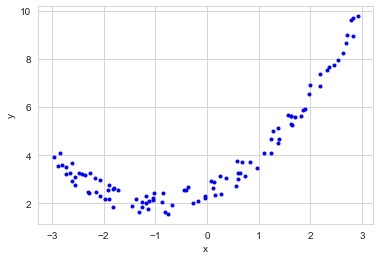

In [44]:
plt.plot(X, y, "b."); plt.xlabel("x"); plt.ylabel("y")

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[-0.75275929] [-0.75275929  0.56664654]


In [49]:
lr = LinearRegression()
lr.fit(X_poly, y)
print("lr.coef_:", (pd.DataFrame(np.hstack(lr.coef_), index=['X', 'X^2'])), sep="\n", end="\n\n")
print("lr.intercept_:", lr.intercept_, sep=" ")

lr.coef_:
            0
X    0.994359
X^2  0.499672

lr.intercept_: [2.49786712]


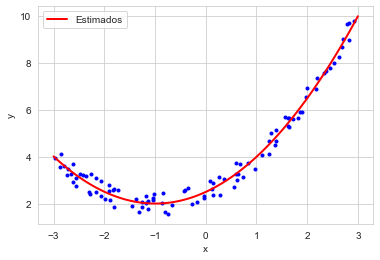

In [52]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Estimados')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left')